In [1]:
%matplotlib notebook
%matplotlib notebook  
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Igor's speedy method...

In [2]:
from __future__ import print_function, absolute_import
from IPython import display
import math
import matplotlib.pyplot as plt
import numpy as np

from multiple_traj_opt import (
    make_mto,
    MultipleTrajOpt,
    initial_conditions_Russ,
    initial_conditions_grid,
    initial_conditions_random,
    initial_conditions_random_all_dims,
)
from nn_system.networks import *

from igor import (
    do_igor_optimization,
    igor_traj_opt_serial,
    igor_traj_opt_parallel,
    igor_supervised_learning,
    igor_supervised_learning_cuda,
    visualize_intermediate_results,
)

## Applying to Pendulum

doing warm start 1549091576.97
70 took 0.11s
20 took 0.33s
100 took 0.15s
10 took 0.38s
0 took 0.38s
30 took 0.47s
120 took 0.17s
130 took 0.24s
110 took 0.42s
80 took 0.78s
40 took 0.98s
140 took 0.64s
60 took 1.07s
90 took 0.98s
50 took 2.89s
finished warm start 1549091587.44


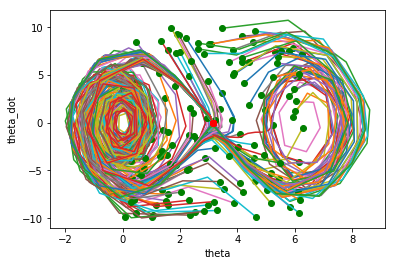

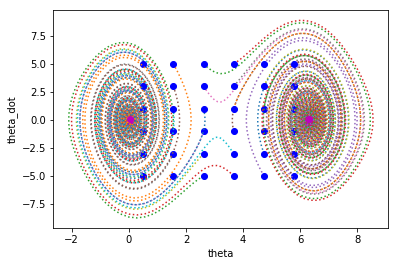

total cost =  15099.834439872364


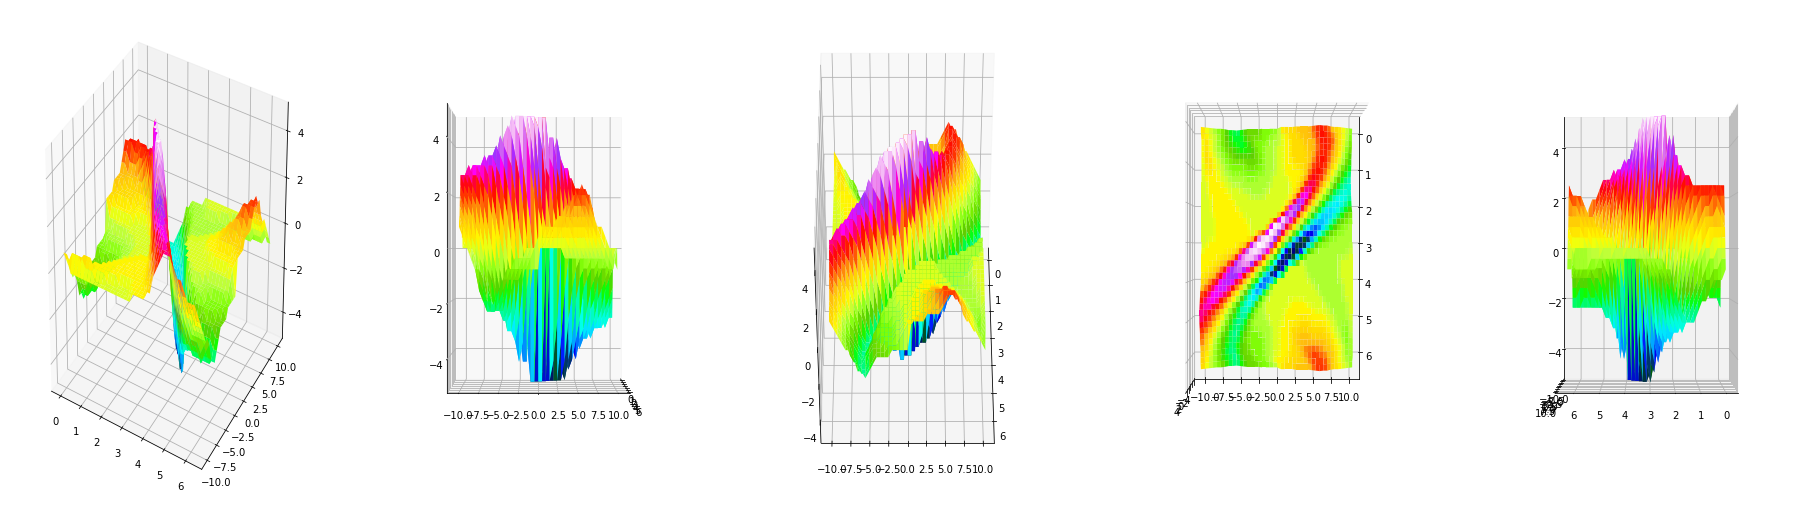

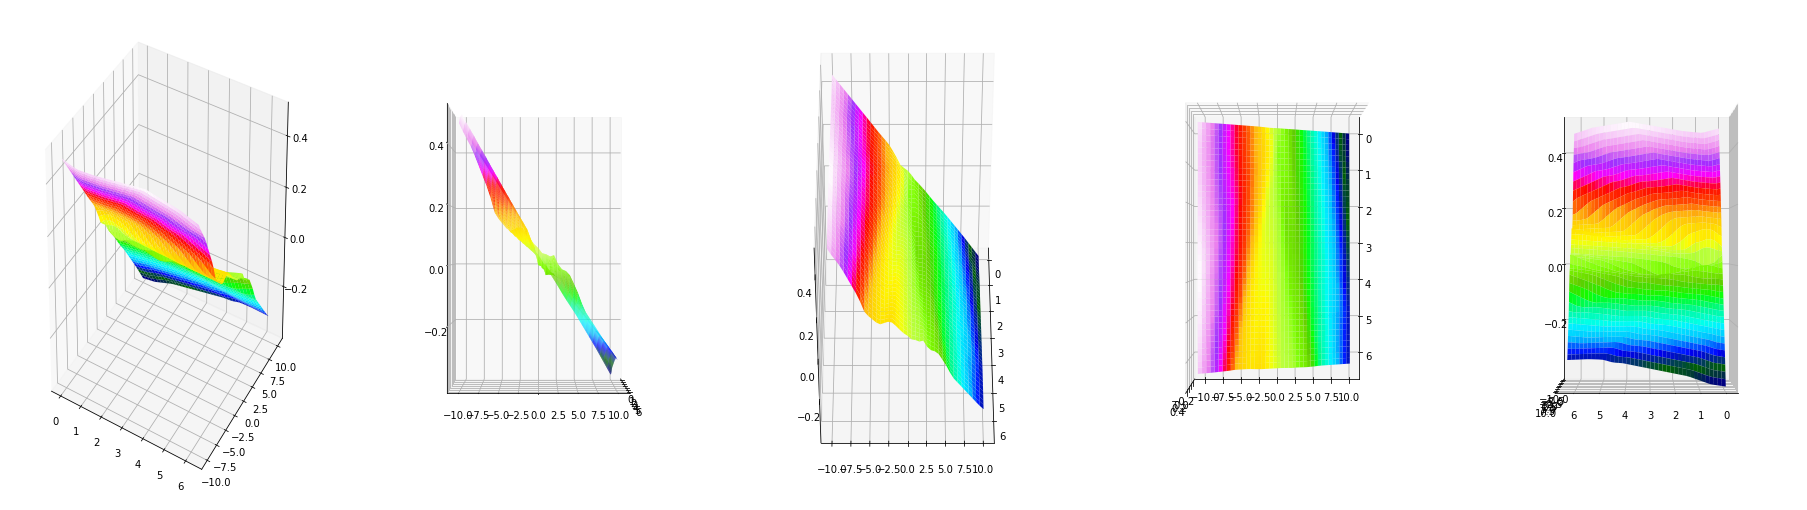

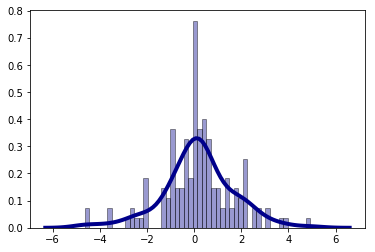

nn - vi policy deviations: avg=0.17, std=1.50, MSE=330.48, MAE=1.08
Training on 144/144 trajs
1549091602.45

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '1000', '5', '0.03']
(144, 32) (144, 32, 2) (144, 32, 1)
(32,) (32, 2) (32, 1)
it's doing stuff...
True 1000 5 0.03
(4464, 2)
(4464, 1)
using prox cost!
[1,  1000] loss: 0.729 prox_loss: 0.000
[2,  1000] loss: 0.438 prox_loss: 0.000
[3,  1000] loss: 0.369 prox_loss: 0.000
[4,  1000] loss: 0.334 prox_loss: 0.000
[5,  1000] loss: 0.319 prox_loss: 0.000
Finished Training
remote net params hash:  -1413509153507858966

rsyncing files back to local...
loading the new state dict...

local net params hash:  -1413509153507858966
1549091648.06
quit simulation early at np.sum(state) = 32.4693388833 due to leaving state bounds
quit simulation early at np.sum(state) = 50.4362014322 due to leaving state bounds
quit simulation earl

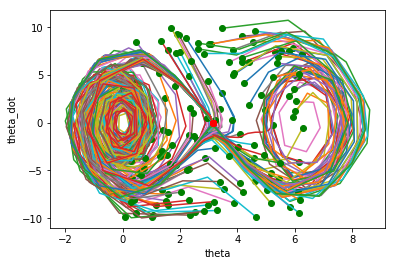

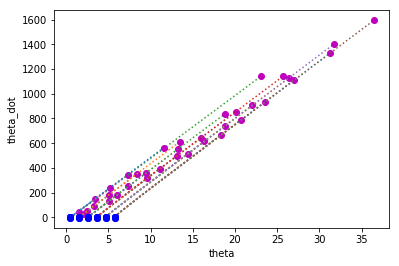

total cost =  2753907500.1569057


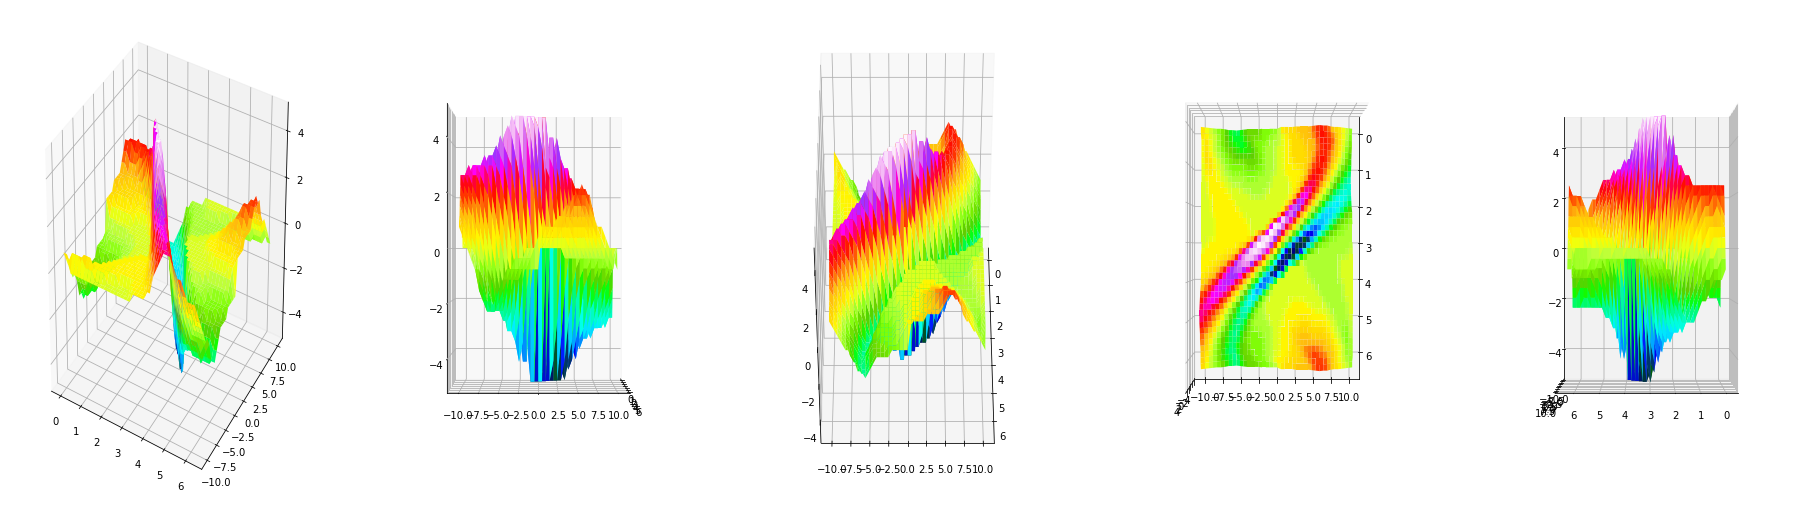

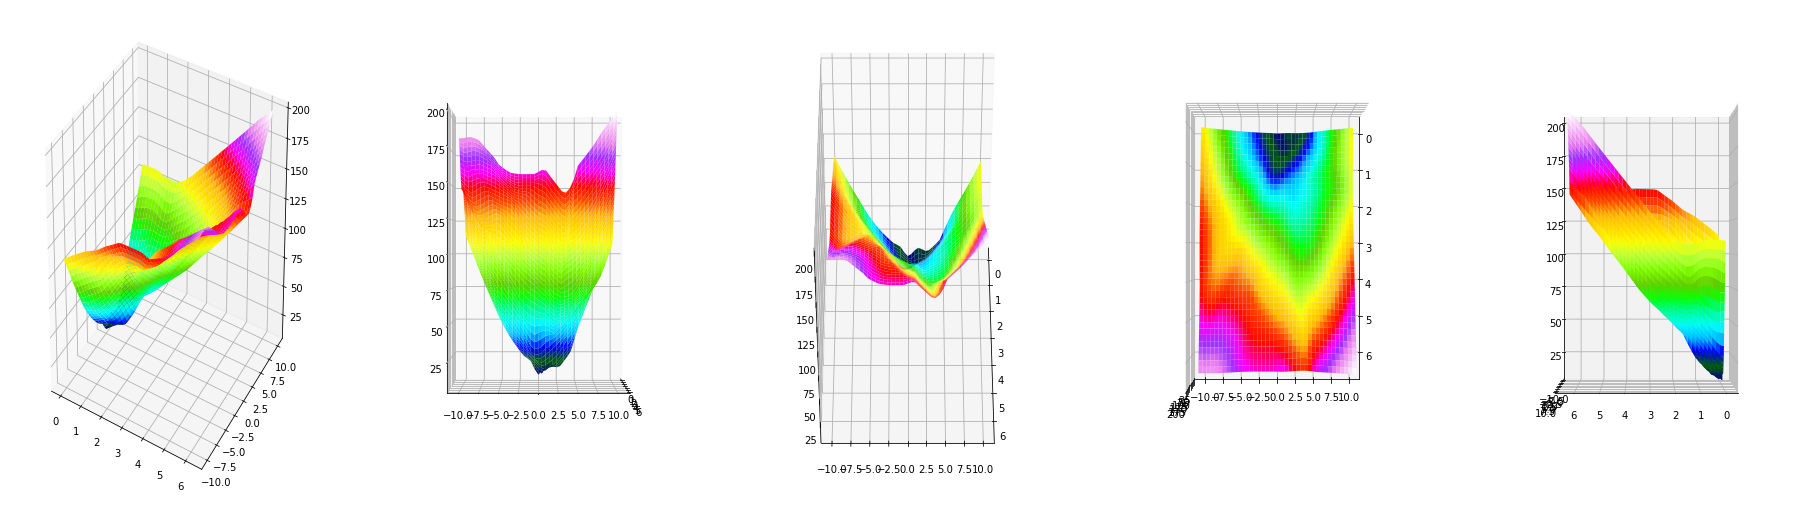

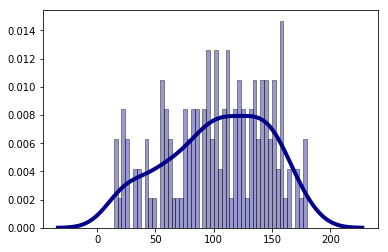

nn - vi policy deviations: avg=103.52, std=43.08, MSE=1810264.96, MAE=103.52
70 took 2.10s
80 took 2.25s
RESULT:  SolutionResult.kUnknownError
10 took 4.72s
30 took 4.84s
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
110 took 4.30s
120 took 3.38s
RESULT:  SolutionResult.kUnknownError
20 took 9.17s
100 took 5.81s
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownError
0 took 10.97s
RESULT:  SolutionResult.kUnknownError
RESULT:  SolutionResult.kUnknownEr

In [ ]:
%matplotlib inline

import sys
seed = 1776; np.random.seed(seed); torch.manual_seed(seed)

from torch.nn.init import *

########################################################
# This is where I'm going to put the settings for all 
# of my sweeps!
########################################################

######################################################
################# Defaults
# First let's just see what Igor Optimization does on pendulum
# Remember to change this on the GPU reciever side too!!!
def kNetConstructor():
     return MLP(2, 32, layer_norm=False, dropout=False)
ic_list=None
warm_start="linear"


######################################################
################# None
fname = "Igor_pend.csv"


######################################################
################# Dropout
# fname = "Igor_pend_dropout_nn4.csv"
# def kNetConstructor():
#     return MLP(n_inputs=2, h_sz=32, dropout=True)


######################################################
################# Init
# fname = "Igor_pend_init.csv"
# def kNetConstructor():
#     return MLP(n_inputs=2, h_sz=12, init = kaiming_uniform_)


######################################################
################# Noise
# fname = "Igor_pend_input_noise.csv"
# def kNetConstructor():
#     return MLP(n_inputs=2, h_sz=32, input_noise=0.1)

# fname = "Igor_pend_output_noise.csv"
# def kNetConstructor():
#     return MLP(n_inputs=2, h_sz=32, output_noise=0.1)

# fname = "Igor_pend_both_noise3.csv"
# def kNetConstructor():
#     return MLP(n_inputs=2, h_sz=32, dropout=False, input_noise=.08, output_noise=.08)

######################################################
# ################# Layernorm
# fname = "Igor_pend_layernorm.csv"
# def kNetConstructor():
#     return MLP(n_inputs=2, h_sz=32, layer_norm=True)

######################################################
################# Minibatching
# fname = "Igor_pend_minibatching.csv"
# TODO - will have to modify Igor code to support mini-batching


######################################################
################ Warm Starting
# fname = "Igor_pend_no_warm_start.csv"
# warm_start=None

# fname = "Igor_pend_linear_warm_start.csv"
# warm_start="linear"

fname = "Igor_pend_random_warm_start.csv"
warm_start="random"

# fname = "Igor_pend_target_warm_start.csv"
# warm_start="target"


######################################################
################# Pruning
# fname = "Igor_pend_pruned_warm_starts"
# TODO

######################################################
################# csv stuff
root_dir = "sweep_csvs/"
HEADER = ["time", "itr", "avg", "std", "MSE", "MAE", "total_cost"]
import csv
def write_header():
    with open(root_dir+fname, mode='w') as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerow(HEADER)
def write_row(time, itr, avg, std, MSE, MAE, total_cost):
    with open(root_dir+fname, mode='a') as f:
        writer = csv.writer(f, delimiter=',')
        writer.writerow([time, itr, avg, std, MSE, MAE, total_cost])
write_header()


net = kNetConstructor()
expmt = "pendulum"
do_igor_optimization(net, kNetConstructor, expmt, ic_list, naive=False, warm_start=warm_start, write_row=write_row)

## Applying to Cartpole

doing warm start 1548573209.83
result=SolutionResult.kUnknownError
30 took 15.08s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
20 took 15.12s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
70 took 15.13s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kU

180 took 15.23s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
270 took 15.13s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
260 took 15.14s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
280 took 15.14s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
290 took 15.15s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
300 took 15.13s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
320 took 15.10s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
330 took 15.06s
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
230 took

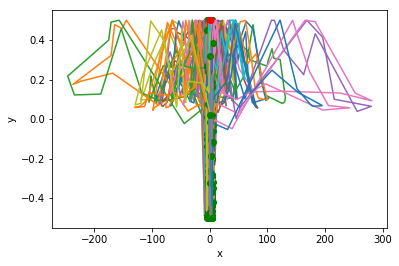

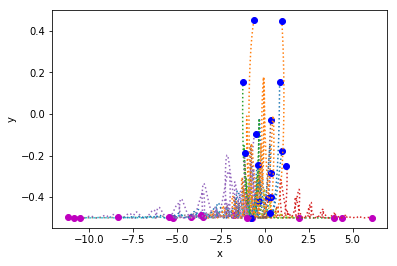

Training on 400/400 trajs
1548573331.26

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '10', '15', '0.01']
(400, 21) (400, 21, 4) (400, 21, 1)
(21,) (21, 4) (21, 1)
True 10 15 0.01
(8000, 4)
(8000, 1)
using prox cost!
[1,    10] loss: 1579.129 prox_loss: 0.000
[2,    10] loss: 1493.005 prox_loss: 0.000
[3,    10] loss: 1423.905 prox_loss: 0.000
[4,    10] loss: 1366.471 prox_loss: 0.000
[5,    10] loss: 1315.706 prox_loss: 0.000
[6,    10] loss: 1279.453 prox_loss: 0.000
[7,    10] loss: 1252.326 prox_loss: 0.000
[8,    10] loss: 1226.332 prox_loss: 0.000
[9,    10] loss: 1202.894 prox_loss: 0.000
[10,    10] loss: 1190.190 prox_loss: 0.000
[11,    10] loss: 1170.308 prox_loss: 0.000
[12,    10] loss: 1154.020 prox_loss: 0.000
[13,    10] loss: 1138.412 prox_loss: 0.000
[14,    10] loss: 1122.636 prox_loss: 0.000
[15,    10] loss: 1116.249 prox_loss: 0.000
Finished Tra

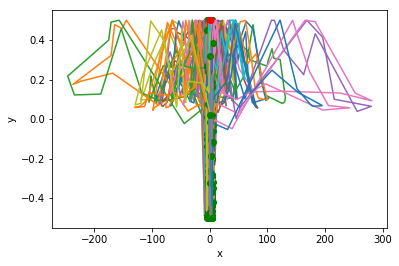

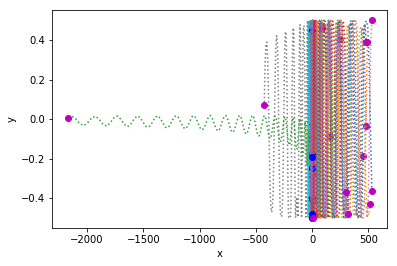

0 took 15.10s
20 took 15.10s
10 took 15.16s
30 took 15.09s
50 took 15.09s
40 took 15.14s
70 took 15.10s
60 took 15.23s
80 took 15.15s
90 took 15.10s
110 took 15.10s
120 took 15.20s
100 took 15.32s
130 took 15.22s
140 took 15.21s
150 took 15.13s
160 took 15.16s
170 took 15.16s
190 took 15.14s
180 took 15.24s
200 took 15.14s
210 took 15.12s
220 took 15.10s
230 took 15.10s
250 took 15.11s
240 took 15.14s
260 took 15.12s
270 took 15.14s
280 took 15.13s
290 took 15.08s
300 took 15.17s
310 took 15.08s
320 took 15.12s
330 took 15.08s
340 took 15.11s
350 took 15.07s
370 took 15.09s
360 took 15.19s
390 took 15.08s
380 took 15.14s
Training on 397/400 trajs
1548573468.8

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '10', '15', '0.01']
(397, 21) (397, 21, 4) (397, 21, 1)
(21,) (21, 4) (21, 1)
True 10 15 0.01
(7940, 4)
(7940, 1)
using prox cost!
[1,    10] loss: 465.248 prox_loss:

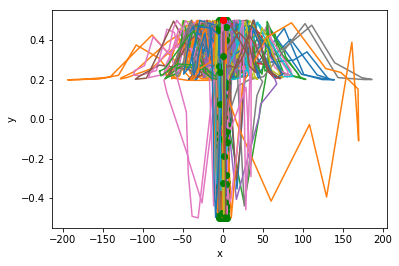

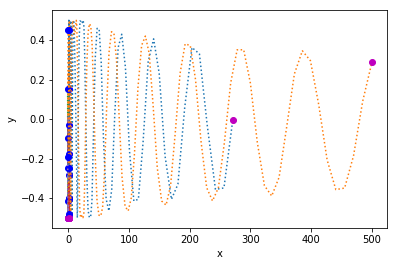

0 took 15.15s
20 took 15.09s
30 took 15.09s
10 took 15.22s
40 took 15.16s
50 took 15.14s
60 took 15.15s
70 took 15.12s
120 took 15.09s
90 took 15.23s
110 took 15.17s
80 took 15.31s
130 took 15.12s
100 took 15.30s
140 took 15.21s
150 took 15.15s
160 took 15.25s
170 took 15.18s
180 took 15.14s
200 took 15.16s
210 took 15.17s
190 took 15.27s
220 took 15.10s
230 took 15.10s
240 took 15.18s
250 took 15.09s
260 took 15.16s
290 took 15.11s
270 took 15.18s
300 took 15.09s
280 took 15.15s
310 took 15.09s
320 took 15.18s
330 took 15.17s
340 took 15.22s
350 took 15.08s
360 took 15.15s
370 took 15.08s
380 took 15.06s
390 took 15.09s
Training on 398/400 trajs
1548573605.84

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '10', '15', '0.01']
(398, 21) (398, 21, 4) (398, 21, 1)
(21,) (21, 4) (21, 1)
True 10 15 0.01
(7960, 4)
(7960, 1)
using prox cost!
[1,    10] loss: 341.214 prox_loss

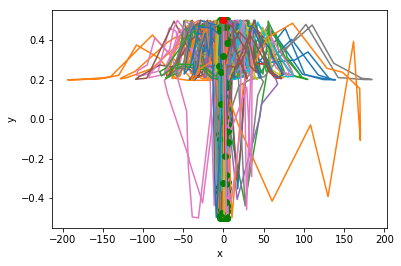

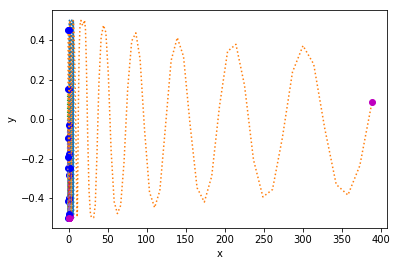

0 took 15.08s
10 took 15.20s
20 took 15.10s
30 took 15.08s
40 took 15.12s
50 took 15.09s
60 took 15.19s
70 took 15.09s
80 took 15.13s
90 took 15.15s
100 took 15.12s
110 took 15.09s
120 took 15.11s
130 took 15.09s
140 took 15.09s
150 took 15.19s
160 took 15.21s
170 took 15.12s
190 took 15.12s
180 took 15.26s
210 took 15.09s
200 took 15.13s
220 took 15.10s
230 took 15.10s
240 took 15.11s
250 took 15.10s
260 took 15.13s
270 took 15.16s
290 took 15.11s
280 took 15.19s
310 took 15.10s
300 took 15.13s
320 took 15.11s
330 took 15.19s
340 took 15.17s
350 took 15.08s
360 took 15.12s
370 took 15.09s
380 took 15.07s
390 took 15.13s
Training on 397/400 trajs
1548573742.81

saving torch state dict -> GPU_model.pt
rsync-ing files to remote
remotely training!
args:  ['/home/rverkuil/integration/drake-pytorch/python/remote_train.py', '1', '10', '15', '0.01']
(397, 21) (397, 21, 4) (397, 21, 1)
(21,) (21, 4) (21, 1)
True 10 15 0.01
(7940, 4)
(7940, 1)
using prox cost!
[1,    10] loss: 345.571 prox_loss

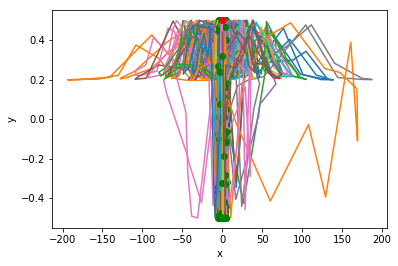

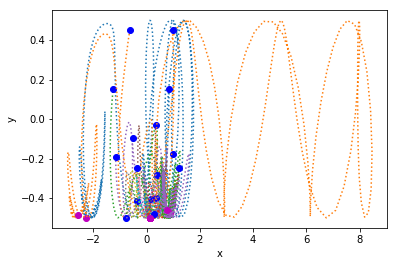

0 took 15.15s
10 took 15.13s
20 took 15.10s
30 took 15.13s
40 took 15.10s
50 took 15.11s
60 took 15.19s
70 took 15.17s
80 took 15.09s
90 took 15.10s
100 took 15.18s
110 took 15.19s
120 took 15.20s
130 took 15.15s
140 took 15.17s
150 took 15.12s
160 took 15.13s
170 took 15.09s


In [ ]:
%matplotlib inline
# First let's just see what Igor Optimization does on pendulum
def kNetConstructor():
    return MLP(4, 128, layer_norm=False)
net = kNetConstructor()
expmt = "cartpole"
ic_list=None

# warm_start=None
# warm_start="linear"
# warm_start="random"
warm_start="target"
np.random.seed(1776)
do_igor_optimization(net, kNetConstructor, expmt, ic_list, naive=False, warm_start=warm_start)

In [ ]:
import torch
torch.save(net.state_dict(), "trained_net.pth")

In [ ]:
%matplotlib inline
from traj.vi_utils import (do_dircol_cartpole)
import time

start = time.time()
dircol, result = do_dircol_cartpole(ic           = (-10., 0., 0., 0.), 
                   num_samples  = 42, 
                   min_timestep = 0.1, 
                   max_timestep = 0.4, 
                   warm_start   = "linear", 
                   seed         = 1776, 
                   should_vis   = False, 
                   torque_limit = 250., 
                   target_traj  = None)
print("took {}".format(time.time() - start))





## Applying to to Pendulum

In [ ]:
# First let's just see what Igor Optimization does on pendulum
net = FCBIG(2, 128)
expmt = "pendulum"
num_trajectories = # TODO: have some default for pendulum and cartpole
ic_list = initial_conditions_grid(num_trajectories, ) # TODO: have some default for pendulum and cartpole
do_igor_optimization(net, expmt, ic_list, warm_start=None, num_trajectories=num_trajectories)

In [ ]:
# Then let's experiment with the different minibatch schemes.
# First let's find a good batch size
ic_gen    = # Expmt default
n_iters   = 
inner_fn  = 
network   = 
traj_bank = []
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method1
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method2
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method3
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method4
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method5
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method6
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Now with adding dropout to favorite warm-starting scheme above


## Applying to to Cartpole

## Compare best method to VI solutions?

<IPython.core.display.Javascript object>


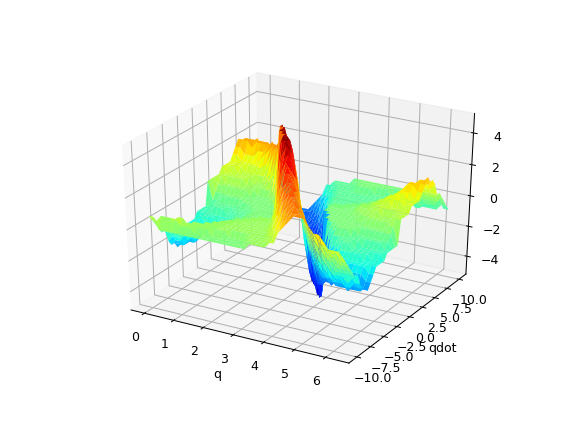

<IPython.core.display.Javascript object>


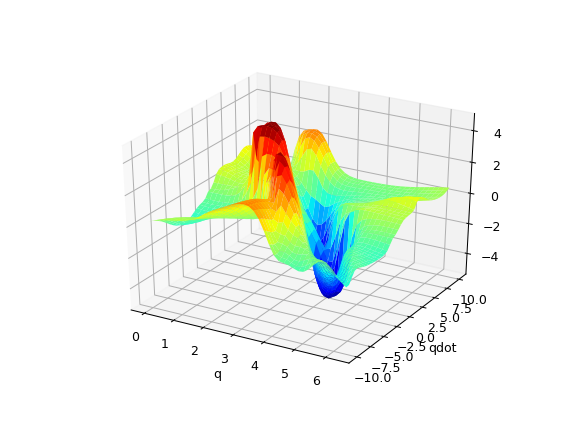

In [211]:
from traj.vi_utils import (
    load_vi_policy,
    vis_vi_policy,
    vis_nn_policy_like_vi_policy
)
vi_policy = load_vi_policy('good', "pendulum")
vis_vi_policy(vi_policy)
vis_nn_policy_like_vi_policy(net, vi_policy)

using_ics=  False
knot_MSE: [13.43466199], traj_MSE: [50.41605436]
[(80000, 2), (80000, 1), (80000, 1)]


<IPython.core.display.Javascript object>


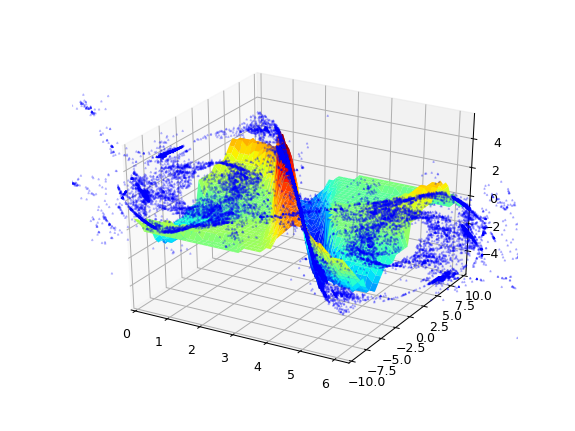

In [201]:
from traj.vi_utils import (graph_vi_policy_vs_traj_knot_scatter)

# ics_or_dircols = ics
ics_or_dircols = dircols
graph_vi_policy_vs_traj_knot_scatter(vi_policy, ics_or_dircols, 
                                     combine_vi_policy_and_scatter=True,
                                     plot_residual=False)